In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, precision_recall_fscore_support
)


In [4]:
df=pd.read_csv("Iris.csv")

In [6]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Target label names
target_names = iris.target_names


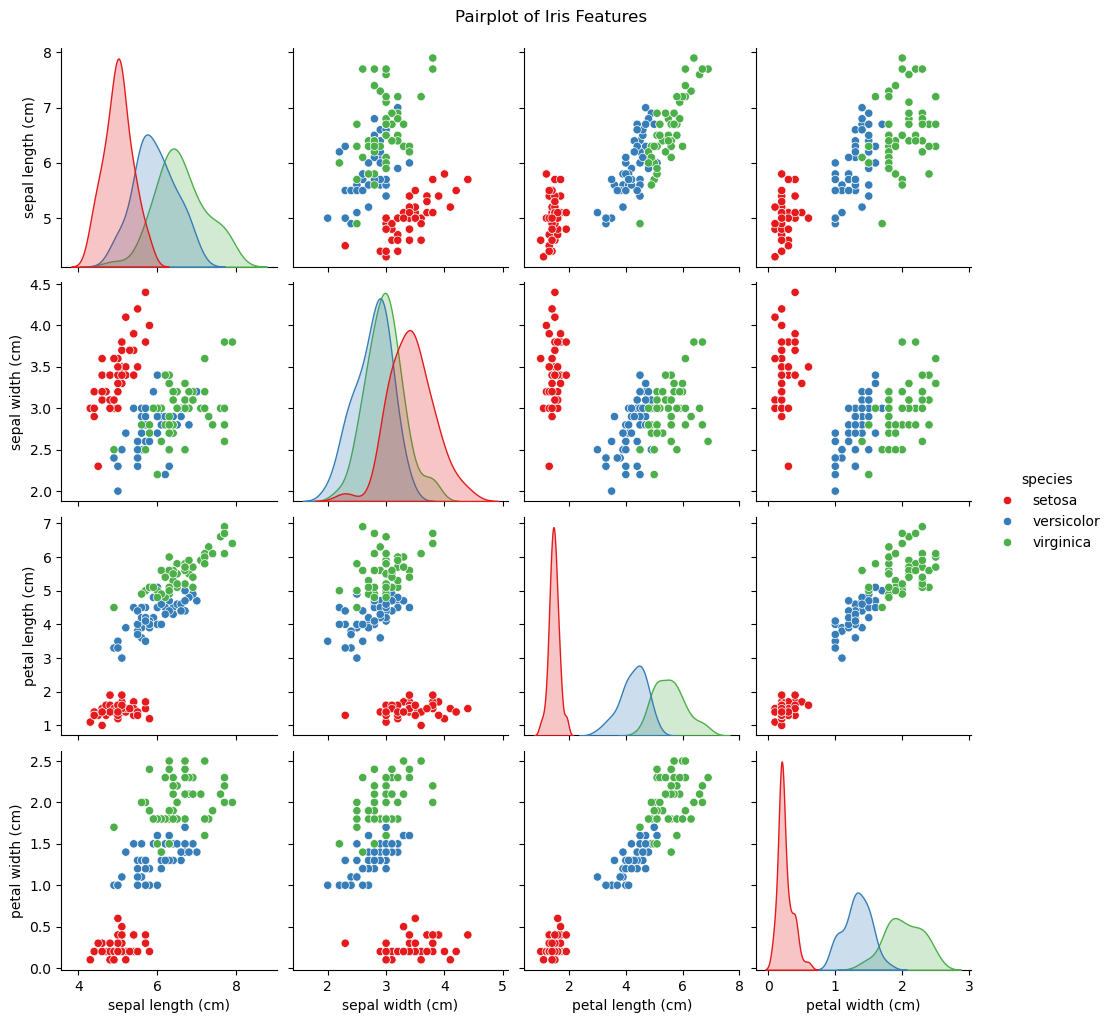

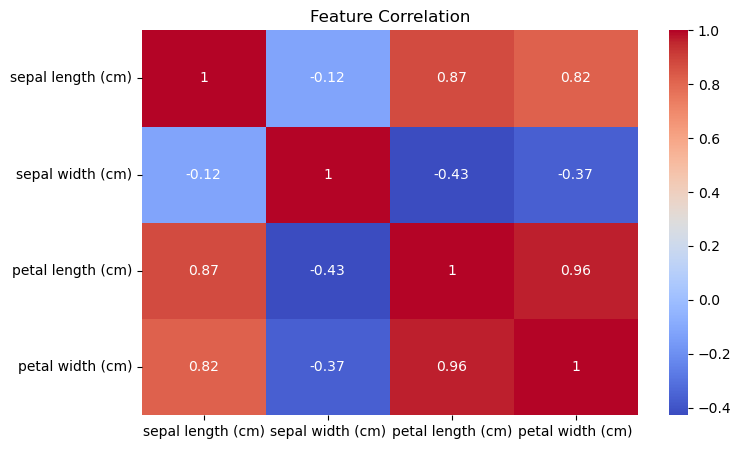

In [11]:
df = X.copy()#Exploratory Data Analysis
df['species'] = y.map({i: name for i, name in enumerate(target_names)})

# Pairplot for understanding distributions
sns.pairplot(df, hue="species", palette="Set1")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [15]:
#train test split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
    
)


In [17]:
# pipeline and scaling
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Hyperparameter tuning
param_grid = {
    'knn__n_neighbors': range(1, 21),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated Score:", grid.best_score_)


Best Parameters: {'knn__n_neighbors': 17, 'knn__p': 2, 'knn__weights': 'distance'}
Best Cross-Validated Score: 0.975


Test Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



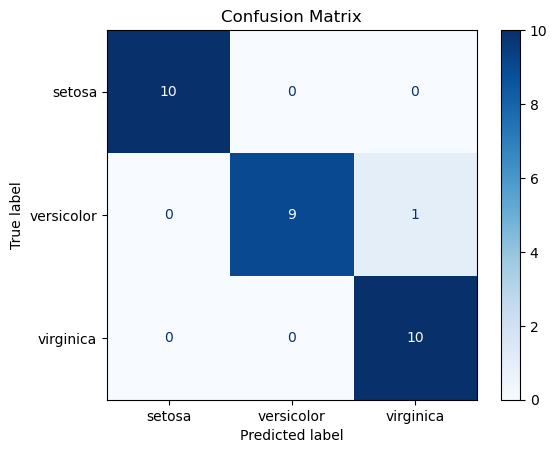

In [19]:
best_model = grid.best_estimator_ # model evaluation
y_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [23]:
#Precision-Recall per Class
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

pr_df = pd.DataFrame({
    'Class': target_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})
print(pr_df)



        Class  Precision  Recall  F1-Score
0      setosa   1.000000     1.0  1.000000
1  versicolor   1.000000     0.9  0.947368
2   virginica   0.909091     1.0  0.952381


In [25]:
import joblib

# Save the trained model
joblib.dump(best_model, 'knn_model.pkl')

# Load the model later
loaded_model = joblib.load('knn_model.pkl')

# Predict using the loaded model
y_loaded_pred = loaded_model.predict(X_test)
